<a name="topo"></a>

# Summary

Author - Pedro Silva Bastos Machado

Github - https://github.com/Pedros-Machado

Linkedin - https://www.linkedin.com/in/pedro-silva-machado-b47b23221/

1. [Dataset](#inicio)
<br>

2. [Shooting Occurrences](#mapas)
    2.1 [With Civil. Casualty](#mapascivil)
    2.2 [With Police Casualty](#mapaspolice)
    2.3 [Reason: Execution](#mapasexec)
    2.4 [Reason: Police op.](#mapasoppolice)
    2.5 [Reason: Attempt/Robbery](#mapasroubo)
<br>

3. [Statistics](#stats)
    3.1 [Occurrences per Month](#monthocorr)
    3.2 [Monthly Variation](#monthvar)
    3.3 [Heatmap](#heatmap)
    3.4 [Correlation Matrix](#correlation)
    3.5 [Scatterplot](#scatter)

<a name="inicio"></a>

# Dataset

Project was developed with Fogo Cruzado's API: https://api.fogocruzado.org.br

- Data from 10/01/2022 to 04/30/2023

In [1]:
import folium
from folium.plugins import HeatMap
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore') # Ignorar qualquer aviso...

sns.set_style("darkgrid")

bairros = ['Abolição', 'Acari', 'Água Santa', 'Alto da Boa Vista', 
                 'Anchieta', 'Andaraí', 'Anil', 'Bancários', 'Bangu', 'Barra da Tijuca', 'Barros Filho', 'Benfica', 
                 'Bento Ribeiro', 'Bonsucesso', 'Botafogo', 'Braz de Pina', 'Cachambi', 'Cacuia', 'Caju', 'Camorim', 
                 'Campinho', 'Campo dos Afonsos', 'Campo Grande', 'Cascadura', 'Catete', 'Catumbi', 'Cavalcanti', 'Centro', 
                 'Cidade Alta', 'Cidade de Deus', 'Cidade Nova', 'Cocotá', 'Coelho Neto', 'Colégio', 'Complexo do Alemão', 
                 'Cordovil', 'Cosme Velho', 'Costa Barros', 'Curicica', 'Del Castilho', 'Deodoro', 'Encantado', 
                 'Engenheiro Leal', 'Engenho da Rainha', 'Engenho de Dentro', 'Engenho Novo', 'Estácio', 'Flamengo', 
                 'Freguesia (Ilha do Governador)', 'Freguesia (Jacarepaguá)', 'Galeão', 'Gamboa', 'Gardênia Azul', 'Gávea', 
                 'Glória', 'Grajaú', 'Grumari', 'Guadalupe', 'Guaratiba', 'Higienópolis', 'Honório Gurgel', 'Humaitá', 
                 'Inhaúma', 'Inhoaíba', 'Ipanema', 'Irajá', 'Itanhangá', 'Jacaré', 'Jacarepaguá', 'Jacarezinho', 
                 'Jardim América', 'Jardim Botânico', 'Jardim Carioca', 'Jardim Guanabara', 'Jardim Sulacap', 'Joá', 'Lagoa', 
                 'Lapa', 'Laranjeiras', 'Leblon', 'Leme', 'Lins de Vasconcelos', 'Madureira', 'Magalhães Bastos', 'Mangueira', 
                 'Manguinhos', 'Maracanã', 'Maré', 'Marechal Hermes', 'Maria da Graça', 'Méier', 'Moneró', 'Olaria', 
                 'Oswaldo Cruz', 'Paciência', 'Padre Miguel', 'Paquetá', 'Parada de Lucas', 'Parque Anchieta', 
                 'Parque Columbia', 'Parque das Missões', 'Penha', 'Piedade', 'Pilares', 'Pitangueiras', 'Portuguesa', 
                 'Praça da Bandeira', 'Praia da Bandeira', 'Praia da Rosa', 'Praia de Botafogo', 'Praia do Flamengo', 
                 'Quintino Bocaiúva', 'Ramos', 'Realengo', "Recreio dos Bandeirantes","Riachuelo",
                 "Ribeira","Ricardo de Albuquerque","Rio Comprido","Rocha","Rocha Miranda","Rocinha","Sampaio" ,"Santa Cruz"
                 ,"Santa Teresa","Santíssimo","Santo Cristo","São Conrado","São Cristóvão","São Francisco Xavier","Saúde"
                 ,"Senador Camará","Senador Vasconcellos","Sepetiba","Tanque","Taquara","Tauá","Tijuca","Todos os Santos"
                 ,"Tomás Coelho","Turiaçu","Urca","Vargem Grande","Vargem Pequena","Vaz Lobo","Vicente de Carvalho"
                 ,"Vidigal","Vigário Geral","Vila Cosmos","Vila da Penha","Vila Isabel","Vila Militar","Vila Valqueire"
           ,"Vista Alegre","Zumbi"]


df = pd.read_csv("https://raw.githubusercontent.com/Pedros-Machado/BR_CriminalityStudy/main/crime_study.csv")

def bairro_get():
    padr = r'\b(' + '|'.join(bairros) + r')\b'

    y = df['local_ocorrencia'].str.extract(padr, flags=re.IGNORECASE)

    j = df['local_ocorrencia'].str.split(',').str[0].str.split('-').str[-1].str.strip()

    y[0] = y[0].fillna(j)
    
    return y[0]


df["bairro_ocorrencia"]=bairro_get()

def limpa_bairro():
    df.replace({"bairro_ocorrencia": {"Osvaldo Cruz": "Oswaldo Cruz",
                                      "Rua Clarimundo de Melo": "Piedade",
                                      "Rua Idume": "Brás de Pina", 
                                      "Rua Iguaperiba": "Brás de Pina","R. Abaíra": "Brás de Pina",
                                      "Rua Guilherme Veloso": "Praça Seca",
                                      "Rua Arnaldo Guinle": "Coelho Neto","R. Saçu":"Quintino Bocaiuva",
                                      "R. Cândido Benício": "Campinho","R. Edmundo Júnior":"Pavuna"
                                      ,"Av. Chrisóstomo Pimentel de Oliveira":"Pavuna","":"desconhecido"
                                      ,"Rua Florianópolis":"Praça Seca",'Rua Álvaro de Miranda':"Pilares"}}, inplace=True)
    df.loc[df["bairro_ocorrencia"] == "RJ", "bairro_ocorrencia"] = "Complexo do Chapadão"
    df.loc[df["local_ocorrencia"].str.contains("Vila Kennedy"), "bairro_ocorrencia"] = "Vila Kennedy"


limpa_bairro()

df.tail(3)

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,...,vitima_idoso_qtd_feridos_oc,info_adicional_idoso_ferido_oc,informacao_via_oc,descricao_via_interrompida_oc,data_interrupcao_via_oc,data_liberacao_via_oc,outros_recortes,motivo_principal,motivo_complementar,bairro_ocorrencia
1287,56793,"Morro do Campinho, Complexo do Fubá - Cascadur...",-22.884480,-43.338170,2023-04-30,14:02:00,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Não identificado,NaN,Campinho
1288,56794,"Complexo do Chapadão - Costa Barros, Rio de Ja...",-22.821014,-43.374957,2023-04-30,06:00:00,0,2,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Disputa,NaN,Costa Barros
1289,56797,"Manguinhos - Av. Brasil, 4365 - Manguinhos, Ri...",-22.877484,-43.243838,2023-04-30,07:00:00,0,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Outro,NaN,Manguinhos


<br>

<a name="mapas"></a>


# Shooting Occurrences Maps

[Summary](#topo)

In [2]:
def mapa_ocorrencia():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia()

<br>

<a name="mapascivil"></a>

## With Civilian Casualty

[Summary](#topo)

In [3]:
def mapa_ocorrencia_civilcasualty():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['qtd_morto_civil_ocorrencia'] > 0:
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_civilcasualty()

<br>

<a name="mapaspolice"></a>

## With Police Casualty

[Summary](#topo)

In [4]:
def mapa_ocorrencia_policecasualty():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['qtd_morto_agen_segur_ocorrencia'] > 0:
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_policecasualty()

<br>

<a name="mapasexec"></a>

## Reason: Execution

[Summary](#topo)

In [5]:
def mapa_ocorrencia_execution():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['motivo_principal'] == "Execução":
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_execution()

<br>

<a name="mapasoppolice"></a>

## Reason: Police Operation

[Summary](#topo)

In [6]:
def mapa_ocorrencia_policeop():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['motivo_principal'] == "Operação policial":
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_policeop()

<br>

<a name="mapasroubo"></a>

## Reason: Attempt/Robbery 

[Summary](#topo)

In [7]:
def mapa_ocorrencia_robbery():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['motivo_principal'] == "Tentativa/Roubo":
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_robbery()

<br>

<a name="stats"></a>

# Statistics
### Number of Shooting Occurrences

For better visualization I considered in the plot only neighborhoods with __10 or more occurrences__.

[Summary](#topo)

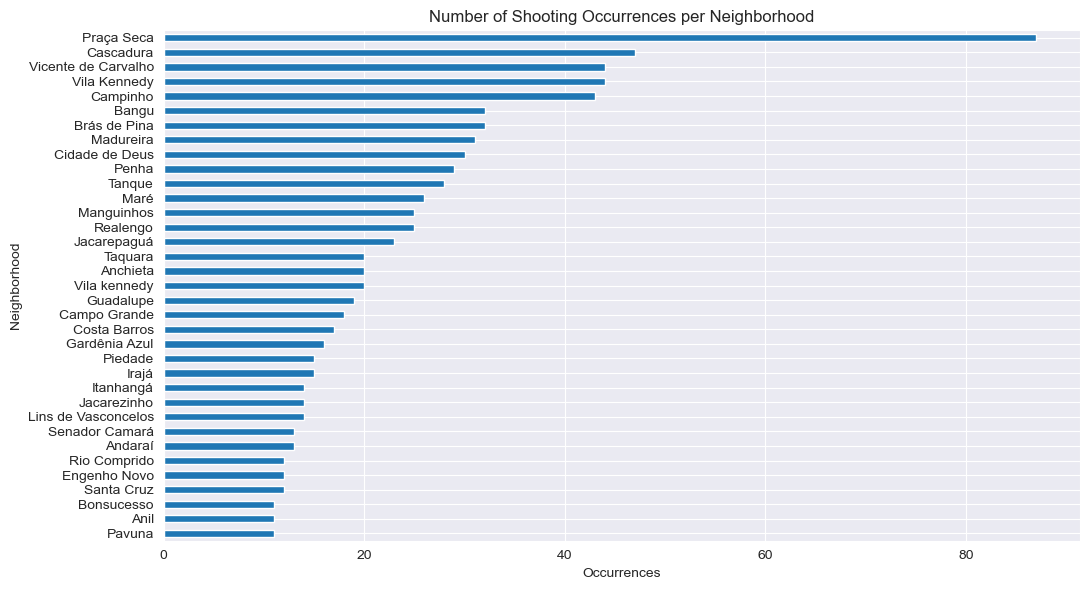

In [8]:
def ocorrencias_bairro():
    plt.rcParams.update({"font.size": 10})
    ocorrencias = df["bairro_ocorrencia"].value_counts()
    ocorrencias = ocorrencias[ocorrencias > 10]
    ocorrencias = ocorrencias.sort_values(ascending=True)
    plt.figure(figsize=(11, 6))
    ocorrencias.plot.barh()
    plt.title("Number of Shooting Occurrences per Neighborhood")
    plt.xlabel("Occurrences")
    plt.ylabel("Neighborhood")
    plt.tight_layout()
    plt.show()
    
ocorrencias_bairro()

In [9]:
def check_ocorrencias(bairro):
    ocorrencias = df["bairro_ocorrencia"].value_counts()
    if bairro in ocorrencias:
        print(f"{bairro} had {ocorrencias[bairro]} occurrences from 10/01/2022 to 04/30/2023.")
    else:
        print(f"{bairro} had 0 occurrences.")
        
check_ocorrencias("Barra da Tijuca")

Barra da Tijuca had 2 occurrences from 10/01/2022 to 04/30/2023.


<a name="monthocorr"></a>

### Number of Occurrences per Month

[Summary](#topo)

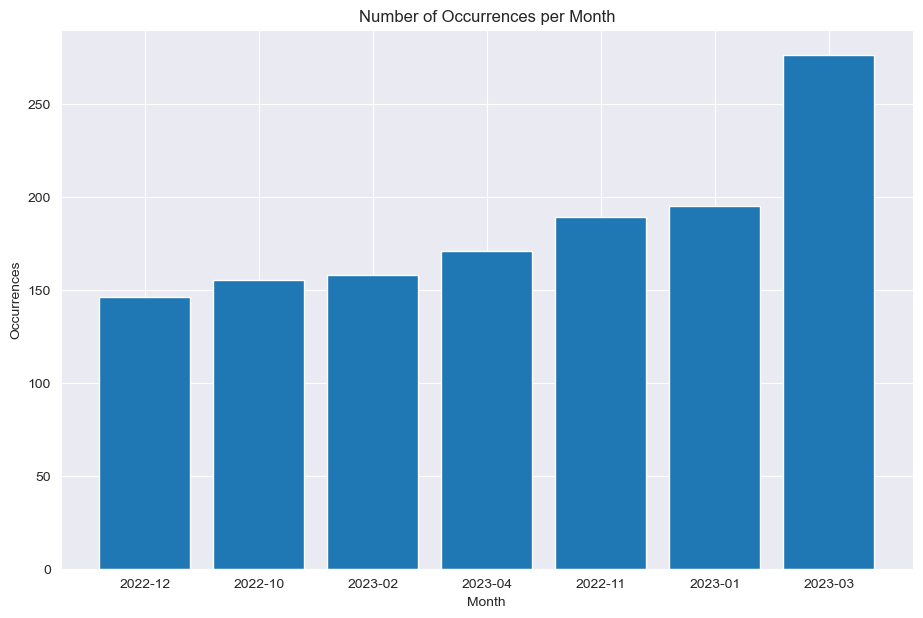

In [10]:
def mensal_ocorrencia():
    plt.rcParams.update({"font.size": 10})
    plt.figure(figsize=(11, 7))
    
    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'])

    df_mensal = df.groupby(pd.Grouper(key='data_ocorrencia', freq='M'))['id_ocorrencia'].count()
    
    df_mensal_sorted = df_mensal.sort_values()
    
    plt.bar(x=df_mensal_sorted.index.strftime('%Y-%m'), height=df_mensal_sorted.values)
    plt.title("Number of Occurrences per Month")
    plt.xlabel("Month")
    plt.ylabel("Occurrences")
    plt.show()

mensal_ocorrencia()

<a name="monthvar"></a>

### Monthly Variation of Occurrennces

[Summary](#topo)

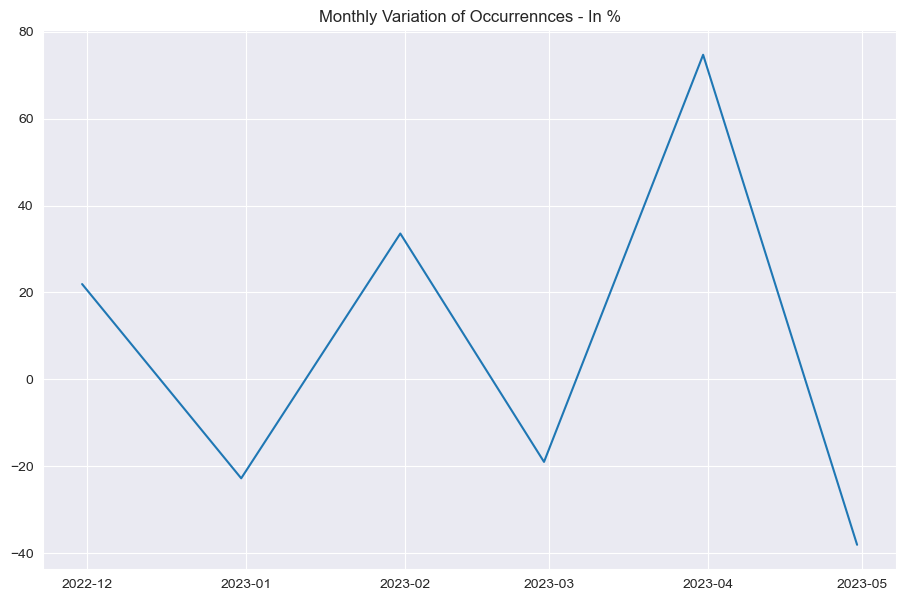

In [11]:
def mensal_dados():
    plt.rcParams.update({"font.size":10})

    plt.figure(figsize=(11,7))
    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'])
    
    df_mensal = df.groupby(pd.Grouper(key='data_ocorrencia', freq='M')).count()

    df_mensal['crescimento'] = df_mensal['id_ocorrencia'].pct_change() * 100

    df_mensal = df_mensal.drop(df_mensal.index[0])
    
    plt.plot(df_mensal["crescimento"])
    plt.title("Monthly Variation of Occurrennces - In %")
    plt.show()
    
mensal_dados()

<a name="heatmap"></a>

### Heatmap of Occurrences

[Summary](#topo)

In [12]:
def heatmap():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11
    
    rio_mapa = folium.Map(location=mapa_centro, zoom_start=11)
    
    bairro_count = df.groupby("bairro_ocorrencia").size().reset_index(name="counts")
    bairro_count["latitude_ocorrencia"] = df.groupby("bairro_ocorrencia")["latitude_ocorrencia"].mean().values
    bairro_count["longitude_ocorrencia"] = df.groupby("bairro_ocorrencia")["longitude_ocorrencia"].mean().values
    
    heat_dados = [[row["latitude_ocorrencia"], row["longitude_ocorrencia"], row["counts"]] for index, row in bairro_count.iterrows()]
    
    mapa = folium.Map(location=mapa_centro, zoom_start=11).add_child(folium.plugins.HeatMap(heat_dados))
    
    return mapa
    
heatmap()

<a name="correlation"></a>

### Correlation Matrix
Development Data Provided by Rio's City Hall: https://www.data.rio/documents/58186e41a2ad410f9099af99e46366fd/about

[Summary](#topo)

In [13]:
df_idh = pd.read_csv("https://raw.githubusercontent.com/Pedros-Machado/RJ_ShootingStudy/main/idhbairro_data.csv")

df_idh.rename(columns={"bairro":"neighborhood","taxa_alfabetizacao":"literacy rate","renda_capita":"income_percapita",
                       "idh":"hdi","esperanca_vida":"life_expectancy","frequencia_escolar":"school_attendance"
                           ,"numero_ocorrencia":"shooting_occurrences"},inplace=True)

df_idh.head(3)

,neighborhood,life_expectancy,literacy rate,school_attendance,income_percapita,hdi
0,Gávea,80.45,98.08,118.13,2139.56,0.970
1,Leblon,79.47,99.01,105.18,2441.28,0.967
2,Jardim Guanabara,80.47,98.92,111.15,1316.86,0.963


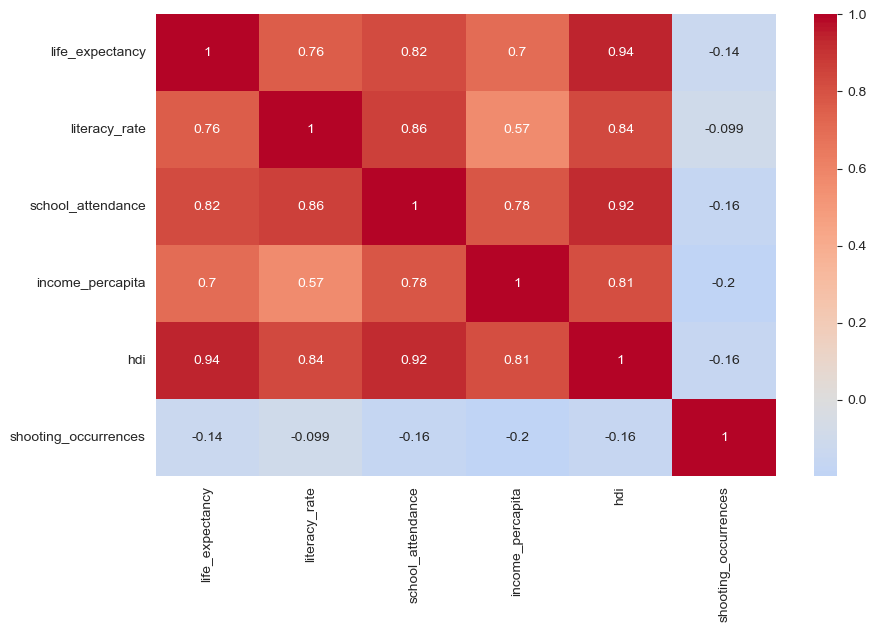

In [14]:
def correl():
    df_idh = pd.read_csv("https://raw.githubusercontent.com/Pedros-Machado/RJ_ShootingStudy/main/idhbairro_data.csv")
    df.rename(columns={"bairro_ocorrencia": "bairro"}, inplace=True)
    df_merge = pd.merge(df, df_idh, on="bairro", how="inner")
    
    df_contagem = df_merge[["bairro", "idh"]].drop_duplicates().reset_index(drop=True)
    df_contagem = df_contagem.merge(df_merge.groupby("bairro").size().reset_index(name="numero_ocorrencia"), on="bairro")

    df_idh = df_idh.merge(df_contagem, on="bairro")
    df_idh.drop(columns={"idh_y"},inplace=True)
    df_idh.rename(columns={"idh_x":"idh"},inplace=True)
    
    df_idh.rename(columns={"bairro":"neighborhood","taxa_alfabetizacao":"literacy_rate","renda_capita":"income_percapita",
                       "idh":"hdi","esperanca_vida":"life_expectancy","frequencia_escolar":"school_attendance"
                           ,"numero_ocorrencia":"shooting_occurrences"},inplace=True)
        
    corr_matrix = df_idh.corr()
    
    plt.figure(figsize=(10,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.show()

correl()

<a name="scatter"></a>

### Scatterplot
Trying to better understand the __Relationship Between Income Per Capita and Shooting Occurences__.

Outliers were removed to assure a clean sample.

[Summary](#topo)

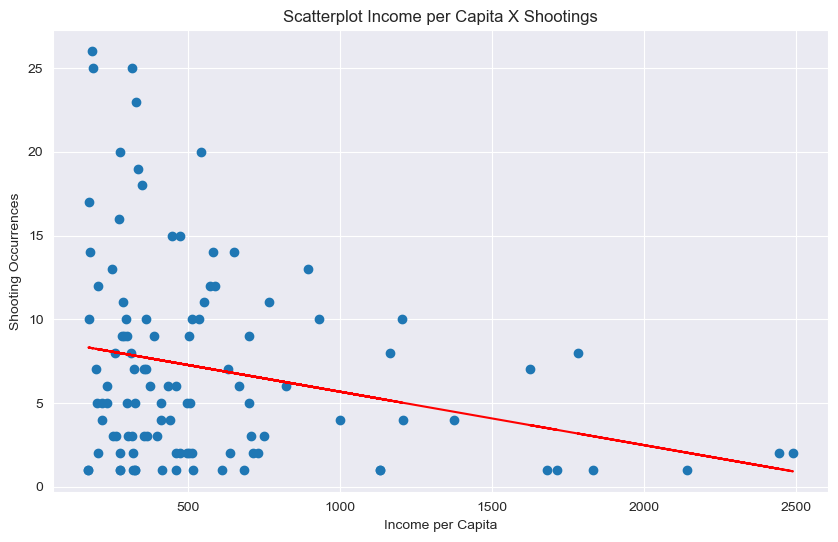

In [15]:
def scatter():
    df_idh = pd.read_csv("https://raw.githubusercontent.com/Pedros-Machado/RJ_ShootingStudy/main/idhbairro_data.csv")
    df.rename(columns={"bairro_ocorrencia": "bairro"}, inplace=True)
    df_merge = pd.merge(df, df_idh, on="bairro", how="inner")

    df_contagem = df_merge[["bairro", "idh"]].drop_duplicates().reset_index(drop=True)
    df_contagem = df_contagem.merge(df_merge.groupby("bairro").size().reset_index(name="numero_ocorrencia"), on="bairro")

    df_idh = df_idh.merge(df_contagem, on="bairro")
    df_idh.drop(columns={"idh_y"}, inplace=True)
    df_idh.rename(columns={"idh_x": "idh"}, inplace=True)

    df_idh.rename(columns={"bairro": "neighborhood", "taxa_alfabetizacao": "literacy_rate",
                           "renda_capita": "income_percapita", "idh": "hdi", "esperanca_vida": "life_expectancy",
                           "frequencia_escolar": "school_attendance", "numero_ocorrencia": "shooting_occurrences"},
                  inplace=True)

    # Remove outliers from 'shooting_occurrences'
    Q1 = df_idh['shooting_occurrences'].quantile(0.25)
    Q3 = df_idh['shooting_occurrences'].quantile(0.75)
    IQR = Q3 - Q1
    df_idh_filtrada = df_idh[(df_idh['shooting_occurrences'] >= Q1 - 1.5 * IQR) &
                             (df_idh['shooting_occurrences'] <= Q3 + 1.5 * IQR)]

    # Filter out income_percapita outliers
    df_idh_filtrada = df_idh_filtrada[df_idh_filtrada['income_percapita'] <= 2500]

    x = df_idh_filtrada["income_percapita"]
    y = df_idh_filtrada["shooting_occurrences"]

    #Calculating m value...
    m = (len(df_idh_filtrada) * (x*y).sum() - x.sum()*y.sum()) / (len(df_idh_filtrada) * (x**2).sum() - (x.sum())**2)

    #Calculating b value...
    b = (sum(y)-m*sum(x))/len(df_idh_filtrada)

    #Creating a list with predictions...
    pred_lista = []

    for i in x:
        y_pred = m*i+b
        pred_lista.append(y_pred)

    df_idh_filtrada["Predictions"] = pred_lista

    plt.figure(figsize=(10,6))

    plt.scatter(x,y)
    plt.plot(x,df_idh_filtrada["Predictions"],color="Red")

    plt.xlabel("Income per Capita")
    plt.ylabel("Shooting Occurrences")
    plt.title("Scatterplot Income per Capita X Shootings")

    plt.show()

scatter()